# 앙상블 학습

## Voting

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 적재
cancer = load_breast_cancer()

In [3]:
pd.DataFrame(cancer.data, columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 개별 모델 생성
lr_clf = LogisticRegression(solver = 'lbfgs', max_iter=2000)
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
dt2_clf = DecisionTreeClassifier(max_depth=3)
dt3_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# 개별 모델을 VotingClassifier에 추가
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),
                                     ('KNN', knn_clf),
                                      ('DT', dt_clf),
                                      ('DT2', dt2_clf),
                                      ('DT3', dt3_clf)], voting = 'soft')

vo_clf

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=2000)),
                             ('KNN', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('DT2', DecisionTreeClassifier(max_depth=3)),
                             ('DT3',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=10))],
                 voting='soft')

In [5]:
# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [6]:
# 학습
vo_clf.fit(X_train, y_train)

C:\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=2000)),
                             ('KNN', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('DT2', DecisionTreeClassifier(max_depth=3)),
                             ('DT3',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=10))],
                 voting='soft')

In [7]:
# 평가
print("학습데이터 정확도:", vo_clf.score(X_train, y_train))
print("테스트데이터 정확도:", vo_clf.score(X_test, y_test))

학습데이터 정확도: 0.9929577464788732
테스트데이터 정확도: 0.958041958041958


In [8]:
vo_clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [9]:
vo_clf.predict_proba(X_test)

array([[1.73717513e-03, 9.98262825e-01],
       [1.93687648e-03, 9.98063124e-01],
       [1.63399661e-03, 9.98366003e-01],
       [1.97721908e-03, 9.98022781e-01],
       [9.95790611e-03, 9.90042094e-01],
       [1.06260126e-01, 8.93739874e-01],
       [4.97666667e-03, 9.95023333e-01],
       [9.01994987e-01, 9.80050131e-02],
       [1.00000000e+00, 1.49885518e-10],
       [9.16818554e-03, 9.90831814e-01],
       [6.65517134e-03, 9.93344829e-01],
       [4.36173381e-02, 9.56382662e-01],
       [1.75653551e-03, 9.98243464e-01],
       [9.54794273e-01, 4.52057269e-02],
       [3.24277217e-03, 9.96757228e-01],
       [3.49741666e-01, 6.50258334e-01],
       [2.16204254e-02, 9.78379575e-01],
       [8.39754587e-01, 1.60245413e-01],
       [4.66215426e-02, 9.53378457e-01],
       [9.99999997e-01, 3.24440827e-09],
       [9.99999646e-01, 3.54037205e-07],
       [1.62378307e-03, 9.98376217e-01],
       [6.01542265e-01, 3.98457735e-01],
       [9.99929908e-01, 7.00918086e-05],
       [9.999995

In [10]:
# 개별 모델 정보 출력


## Bagging - RandomForest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
# 객체 생성
rf_clf = RandomForestClassifier()
rf_params = {
    'n_estimators':[100, 300, 500],
    'max_depth':[3,5,7],    # 위아래 합해서 9개 조합. 700개. 오래 걸려
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rf_clf, param_grid=rf_params, cv=5)

# 학습
grid_rf.fit(X_train, y_train)

# 평가
print("학습데이터 정확도:", grid_rf.score(X_train, y_train))
print("테스트데이터 정확도:", grid_rf.score(X_test, y_test))

학습데이터 정확도: 1.0
테스트데이터 정확도: 0.965034965034965


In [13]:
grid_rf.best_params_

{'max_depth': 7, 'n_estimators': 100, 'n_jobs': -1}

In [14]:
best_rf = grid_rf.best_estimator_

In [15]:
best_rf.feature_importances_

array([0.04038326, 0.02008657, 0.03983402, 0.02913387, 0.00849319,
       0.00678967, 0.05552985, 0.12082429, 0.00359865, 0.00498965,
       0.01041998, 0.0053972 , 0.01574614, 0.03803473, 0.0057295 ,
       0.00241491, 0.00507538, 0.00687513, 0.00388284, 0.00646874,
       0.12184415, 0.02158545, 0.12717601, 0.075134  , 0.01203001,
       0.01644433, 0.0520546 , 0.12580976, 0.01143069, 0.00678344])

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
rf_imp = pd.Series(best_rf.feature_importances_, index=cancer.feature_names)

In [18]:
#  높은 top 10 피쳐만 시각화
rf_imp10 = rf_imp.sort_values(ascending=False).head(10)

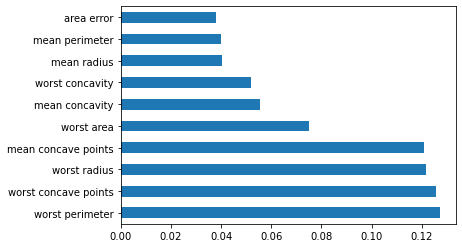

In [19]:
rf_imp10.plot(kind='barh')

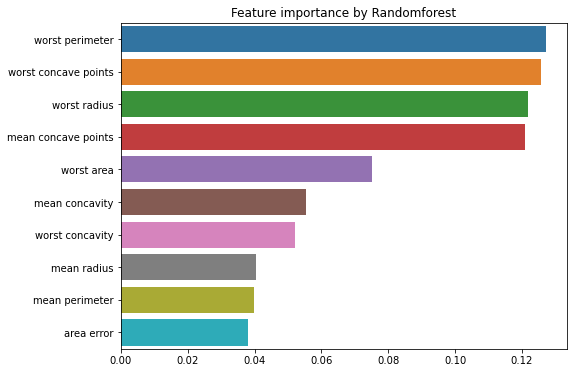

In [20]:
plt.figure(figsize=(8,6))
plt.title('Feature importance by Randomforest')
sns.barplot(x=rf_imp10, y=rf_imp10.index)

## Boosting = GBM (Gradient Boosting Machine)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
gb_clf = GradientBoostingClassifier()
gb_params = {
    'n_estimators':[100, 300, 500],
    'learning_rate':[0.05, 0.1]
    
    
}
grid_gb = GridSearchCV(gb_clf, param_grid = gb_params, cv=5)

gb_clf.fit(X_train, y_train)
print("학습데이터 정확도:", gb_clf.score(X_train, y_train))
print("테스트데이터 정확도:", gb_clf.score(X_test, y_test))

학습데이터 정확도: 1.0
테스트데이터 정확도: 0.965034965034965


## XGBoost 실습

In [24]:
from xgboost import XGBClassifier

In [25]:
xgb_clf = XGBClassifier()

In [29]:
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_set=[(X_test, y_test)], eval_metric='logloss' )

[0]	validation_0-logloss:0.47194
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.35478
[2]	validation_0-logloss:0.27497
[3]	validation_0-logloss:0.22052
[4]	validation_0-logloss:0.18618
[5]	validation_0-logloss:0.15824
[6]	validation_0-logloss:0.13583
[7]	validation_0-logloss:0.12004
[8]	validation_0-logloss:0.10744
[9]	validation_0-logloss:0.09930
[10]	validation_0-logloss:0.09004
[11]	validation_0-logloss:0.08879
[12]	validation_0-logloss:0.08565
[13]	validation_0-logloss:0.08383
[14]	validation_0-logloss:0.08062
[15]	validation_0-logloss:0.08071
[16]	validation_0-logloss:0.07789
[17]	validation_0-logloss:0.07595
[18]	validation_0-logloss:0.07558
[19]	validation_0-logloss:0.07405
[20]	validation_0-logloss:0.07396
[21]	validation_0-logloss:0.07338
[22]	validation_0-logloss:0.07273
[23]	validation_0-logloss:0.07141
[24]	validation_0-logloss:0.07115
[25]	validation_0-logloss:0.07240
[26]	validation_0-logloss:0.07373
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
xgb_clf.score(X_test, y_test)

0.972027972027972

In [33]:
feat_imp = pd.Series(xgb_clf.feature_importances_, index=cancer.feature_names)

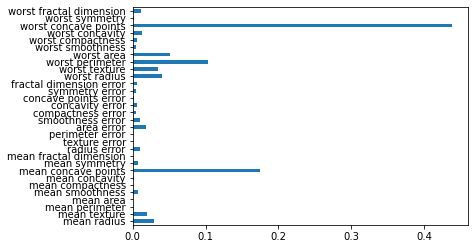

In [34]:
feat_imp.plot(kind='barh')

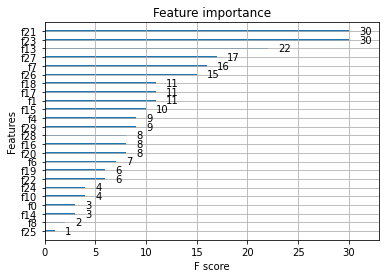

In [35]:
from xgboost import plot_importance
plot_importance(xgb_clf)